# Ch2. 머신러닝 프로젝트 처음부터 끝까지

맛보기로 머신러닝 프로젝트 하나를 처음부터 끝까지 진행합니다.

<머신러닝 주요 단계>

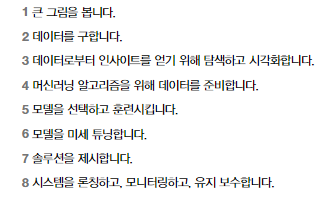

## 2.1 실제 데이터로 작업하기

머신러닝 스터디할 때 실습에 참고할만한 실제 데이터셋이 존재하는 곳 몇 가지...

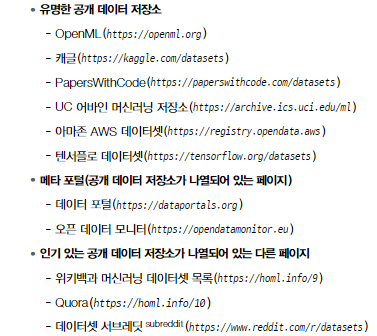

**이번 Chapter에서는 StatLib 저장소에 있는 California Housing Prices 데이터셋 사용**</br>
1990년 캘리포니아 인구 조사 데이터를 기반으로 만들어진 데이터이고
교육 목적으로 사용하기 위해 범주형 특성을 추가하고 일부는 제외

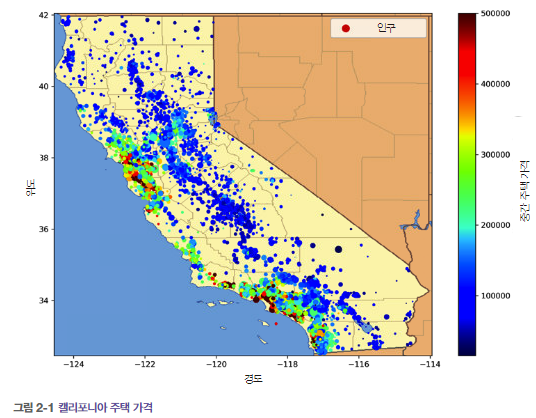

## 2.2 큰 그림 보기

캘리포니아의 인구 조사 데이터 내용
- **구역** = 블록그룹(Block Group): 미국 인구 조사국에서 샘플 데이터 발표하는데 사용하는 최소한의 지리적 단위(1 block: 600~3,000명)
- 인구
- 중간 소득
- 중간 주택 가격
- 기타 등등

이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때 중간 주택 가격 예측

### 2.2.1 문제 정의

**① '비즈니스 목적이 정확히 무엇인가요?'**</br>
→ 문제 구성 방법, 알고리즘 선택, 모델 평가 성능 지표, 모델 튜닝 방법 등에 영향

<예시> 비즈니스 목적: 특정 지역에 투자할 가치가 있는가?</br>
중간 주택 가격 예측 모델을 한개의 **컴포넌트**라고 하면</br>
투자 분석 컴포넌트들과 결합되어 **파이프라인**을 이루고</br>
파이프라인으로 묶인 전체 시스템은 해당 지역에 투자할 가지가 있는지 결정

→ **구역 가격 결정(예측) 모델로 예측한 구역 가격**으로 투자할 가치 여부 판단에 사용

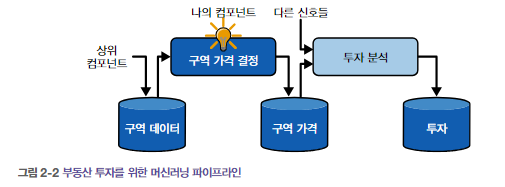

**② '현재 솔루션은 어떻게 구성되어 있나요?**

기존에 구역 주택 가격을 전문가가 **수동으로 추정**한다면 **비용, 시간이 많이 들고 추정 결과도 좋지 않음**</br>
→ 때문에 구역 데이터 기반으로 **가격 예측 모델이 유용**하다고 결정

**③ 모델 훈련 방식 결정**
- 학습 방법 결정(지도, 비지도, 준지도, 자기 지도, 강화 학습): 레이블(구역의 중간 주택 가격)이 있으므로 **지도학습**
- 분류, 회귀?: 여러 특성(인구, 중간 소득)을 통해 주택 가격을 예측하므로 **다중 회귀, 단변량(하나의 값 예측)**, cf. 여러 개의 값을 예측 한다면 다변량 회귀
- 배치 학습, 온라인 학습?: 데이터 연속적인 흐름, 빠르게 변하는 데이터에 대한 적응, 메모리 사용량을 고려하면 **배치 학습**이 적절

요약하자면,</br>
**해결하려는 문제에 따라 학습 방법과 문제 푸는 방식(분류/회귀) 선택해야한다.**

### 2.2.2 성능 측정 지표 선택

모델의 예측 결과값과 실제 값의 차이를 통해 모델을 평가하는 **비용함수**

**2가지 성능 측정 지표 예시**

① 회귀 문제의 전형적인 성능 지표: 평균 제곱근 오차(Root Mean Square Error, RMSE)

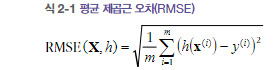

※ 표기법에 대해 교재 참고

② 이상치로 보이는 구역이 많다면 평균 절대 오차(Mean Absolute Error, MAE)

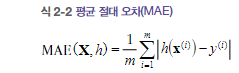

※ 교재 내용 참조

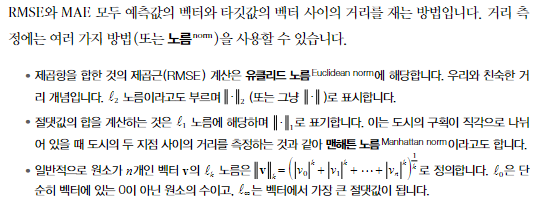

### 2.2.3 가정 검사

가정: 시스템이 출력한 구역의 가격이 다음 머신러닝의 입력으로 사용

하지만 하위 시스템에서 '저렴', '보통', '고가'의 **카테고리 데이터를 원한다면 회귀 문제가 아니라 분류 문제로 접근해야함**

**→ 2.2의 결론은 문제 정의를 통해 머신러닝 모델링 계획을 잘 세워야 한다**

## 2.3 데이터 가져오기

### 2.3.1 구글 코랩을 사용하여 예제 코드 실행하기

예제 코드></br>
https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

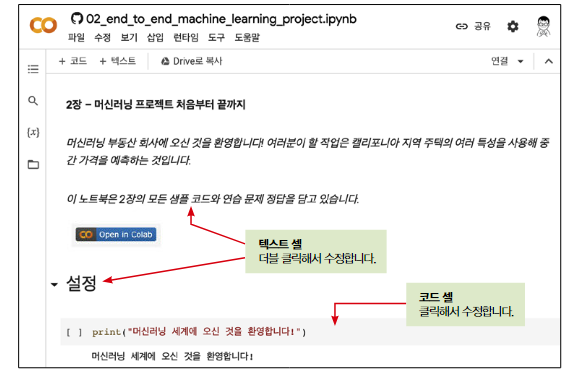

### 2.3.2 코드와 데이터 저장하기

### 2.3.3 대화식 환경의 편리함과 위험

### 2.3.4 책의 코드와 노트북의 코드

### 2.3.5 데이터 다운로드

In [ ]:
# <# import sys

# # # 노트북이 코랩에서 실행 중인지 체크합니다.
# # if 'google.colab' in sys.modules:
# #     !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
# #     # 나눔 폰트를 설치합니다.
# #     !sudo apt-get -qq -y install fonts-nanum
# #     import matplotlib.font_manager as fm
# #     font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
# #     for fpath in font_files:
# #         fm.fontManager.addfont(fpath)

# #     # 나눔바른고딕 폰트로 설정합니다.
# #     import matplotlib.pyplot as plt
# #     plt.rc('font', family='NanumBarunGothic')
# #     # 마이너스 기호 표시 오류 수정
# #     import matplotlib
# #     matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

**데이터 다운로드**

In [ ]:
from pathlib import Path  # 파일경로, 디렉토리
import pandas as pd
import tarfile
import urllib.request     # url 파일 다운로드를 위해

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)               # download
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")             # 압축 풀기
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### 2.3.6 데이터 구조 훑어보기

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


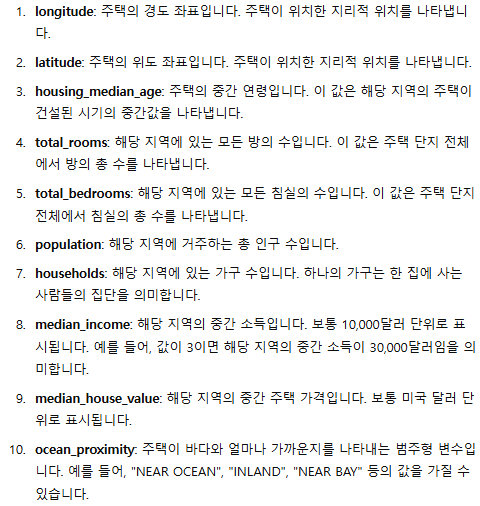

In [ ]:
housing.tail(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


→ total_bedrooms에 널값 존재</br>
→ ocean_proximity만 object</br>

In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


**숫자형 특성 요약 정보**

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


25%, 50%, 75% 는 백분위수(percentile)을 나타냄</br>
cf. 제1사분위수, 중간값, 제3사분위수

**숫자형 특성을 히스토그램으로 확인**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

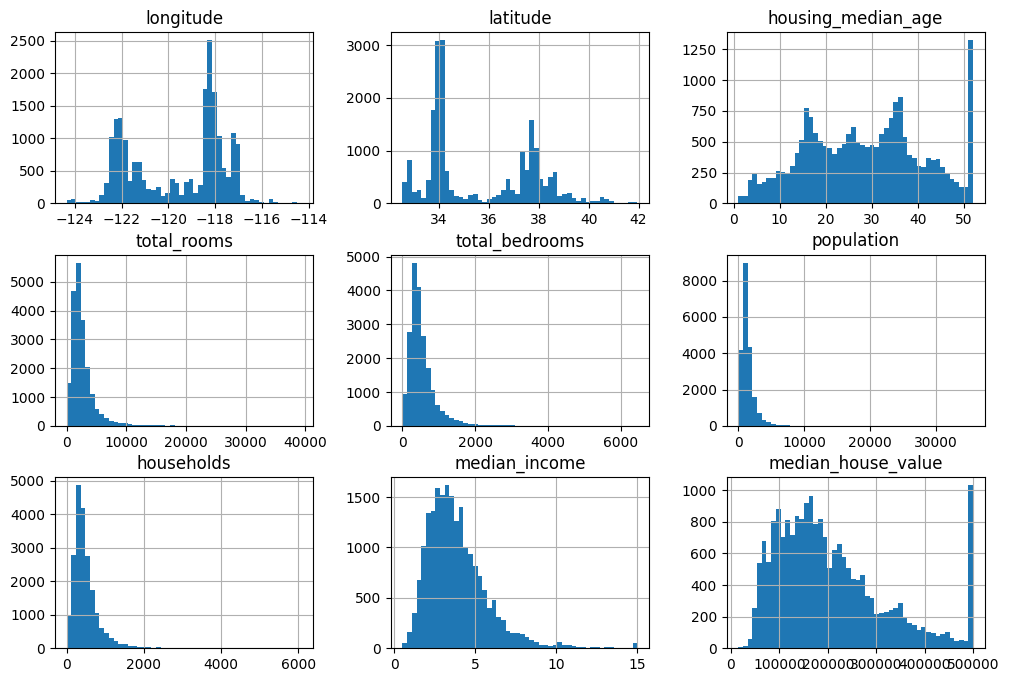

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))

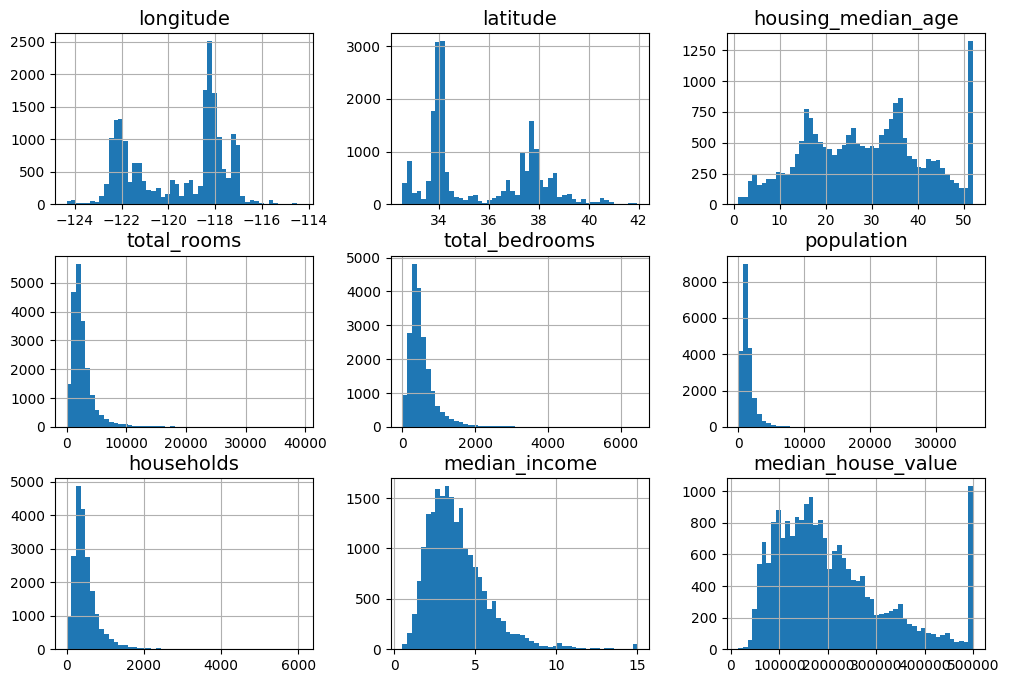

In [ ]:
import matplotlib.pyplot as plt

# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
# save_fig("attribute_histogram_plots")  # 추가 코드
plt.show()

주요 특징
1. median_income은 스케일된 US달러
2. housing_median_age과 median_house_value(레이블, Target Y)의 최대값 한정에 대한 대응 방법
 - 한계값을 없애고 정확한 레이블 사용
 - 훈련 세트에서 한계값 밖의 데이터를 제거하거나 그 값을 포함하는 구역 자체 제거
3. 특성 스케일링이 다름
4. 히스토그램의 분포에서 오른쪽 꼬리가 대부분 김 → 일부 머신러닝 알고리즘에서 패턴을 찾기 어려우므로 종 모양 분포로 변형

### 2.3.7 테스트 세트 만들기

알려진 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 실제에서 기대한 성능이 나오지 않는다.</br>
 데이터를 분석하고 모델을 개발할 때 데이터의 일부 정보를 무의식적으로 이용하여 분석 결과에 영향을 미치는 것을 의미</br>
모델 성능 과대 적합(overfitting) or 성능 저하</br>
→ **데이터 스누핑(Data Snooping) 편향**</br>
&nbsp;&nbsp;&nbsp;&nbsp;  데이터를 반복적으로 탐색하고 분석하여 얻은 결과를 바탕으로 모델을 구축함으로써 발생하는 통계적 편향

이를 방지하기 위해 **훈련 데이터와 테스트 데이터를 엄격히 분리**</br>
일반적으로 8:2의 비율로 분리(하지만 데이터셋이 매우 크다면 그보다 적게)

In [ ]:
import numpy as np

# test_ratio: 테스트 세트로 사용할 데이터의 비율
def shuffle_and_split_data(data, test_ratio):
    # 데이터 인덱스를 무작위로 섞기
    shuffled_indices = np.random.permutation(len(data))
    # 테스트 세트 크기
    test_set_size = int(len(data) * test_ratio)
    # 무작위 인덱스에서 테스트 세트 데이터 비율로 훈련 세트와 테스트 세트 인덱스 나누기
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # 위 인덱스 값으로 각 데이터 리턴
    return data.iloc[train_indices], data.iloc[test_indices]

참고로 np.random.permutation은 무작위로 섞인 새로운 배열 반환

In [ ]:
array = np.array([1, 2, 3, 4, 5])
permuted_array = np.random.permutation(array)
print(permuted_array)

[1 5 2 3 4]


위 코드의 문제점: 매번 실행시마다 데이터 세트(훈련, 테스트)가 달라진다.</br>
→ 해결책
1. 처음 생성시 데이터 세트들을 저장한다.
2. np.random.permutation생성 전에 같은 난수 인덱스가 생성되도록 난수 발생기의 seed값을 지정한다.

해결책 2에서 난수 생성 seed 값을 지정하면 해당 값의 seed 에서는 동일한 난수 시퀀스 생성</br>
seed는 프로그램이 실행되는 동안 메모리에 유지</br>
다른 PC에서 실행하더라도 동일한 난수 시퀀스를 생성, 왜냐하면 numpy의 난수 생성 알고리즘 정해져있기 때문...</br>
<주의> 다만 numpy 버전이 동일 해야함

In [ ]:
array = np.array([1, 2, 3, 4, 5])
np.random.seed(42)
permuted_array = np.random.permutation(array)
print(permuted_array)

[2 5 3 1 4]


**하지만 위 두 해결책 모두 데이터셋이 업데이트 되었을 때 문제가 발생**</br>
→ 대안: 안정적인 데이터 세트 분할을 위한 일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트로 보낼지 결정</br>
&nbsp;&nbsp;&nbsp;&nbsp;(가정: 샘플은 고유한 변경 불가의 식별자를 가지고 있다) </br>
예시. 샘플마다 식별자의 해시값 계산하여 해시 최대값의 20%보다 적거나 같은 샘플만 테스트 세트로 지정

** 해시값을 사용하여 데이터 세트를 나누는 방법은 사용자가 결정한다

In [ ]:
from zlib import crc32      # crc32 해시 함수를 이용하여 ID의 해시값 계산을 위해

def is_id_in_test_set(identifier, test_ratio):
    # 식별자 identifier의 crc32 해시값을 계산하고 test_ratio에 따라 해시값의 최대값을 계산하고
    # 최대값보다 작으면 테스트 세트에 포함되도록 판단하는 함수
    # 참고로 crc32는 32bit의 해시값 생성
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

주택 데이터셋에서 행의 인덱스를 식별자(ID)로 사용

In [ ]:
housing_with_id = housing.reset_index()  # index 열이 추가된 데이터 반환
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

다만 행의 인덱스를 고유 식별자로 사용할 때는 주의점이 있음</br>
- 새로운 데이터는 데이터셋의 끝에 추가
- 어떤 행도 삭제되지 않아야...

**위 조건이 불가능할 경우 안전한 특성을 사용하여 고유 식별자 생성**</br>
실습 예시: 구역의 위도와 경도로 식별자 생성하는 경우(다만 위도 값의 정밀도가 낮아 데이터 샘플링의 편향이 발생할 수 도 있음)

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

※ 주의: 해시값으로 데이터를 나눌 경우 비율이 맞지 않을 수도 있다.

**사이킷런에서 제공하는 train_test_split함수**는 위 shuffle_and_split_data()함수와 비슷하나 두 가지 특성이 더 존재</br>
1. 난수 seed 지정할 수 있는 random_state 매개변수
2. 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 동일한 인덱스를 기반으로 나눌 수 있음

2번 특성 예시

In [ ]:
from sklearn.model_selection import train_test_split

# 예제 데이터프레임 생성
# data1은 feature
data1 = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
})

# data2는 target
data2 = pd.DataFrame({
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
})

# 데이터프레임의 행 개수가 같은지 확인
print(f"data1 shape: {data1.shape}")
print(f"data2 shape: {data2.shape}")

# train_test_split 함수를 사용하여 동일한 인덱스를 기반으로 분할
train_data1, test_data1, train_data2, test_data2 = train_test_split(data1, data2, test_size=0.2, random_state=42)

# 결과 출력
print("\nTrain Data1:\n", train_data1)
print("Test Data1:\n", test_data1)
print("\nTrain Data2:\n", train_data2)
print("Test Data2:\n", test_data2)

data1 shape: (10, 2)
data2 shape: (10, 1)

Train Data1:
    feature1  feature2
5         6        60
0         1        10
7         8        80
2         3        30
9        10       100
4         5        50
3         4        40
6         7        70
Test Data1:
    feature1  feature2
8         9        90
1         2        20

Train Data2:
    target
5       1
0       0
7       1
2       0
9       1
4       0
3       1
6       0
Test Data2:
    target
8       0
1       1


housing 데이터에 train_test_split 적용

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
test_set["total_bedrooms"].isnull().sum()

44

In [ ]:
train_set["total_bedrooms"].isnull().sum()

163

-----------------

위 내용들은 순수한 랜덤 샘플링 방식을 설명</br>
데이터셋이 충분히 크다면 일반적으로 OK

하지만 데이터셋이 충분히 크지 않을 경우 샘플링 편향이 생길 가능성 높음

예시.</br>
미국 인구를 대표하는 1,000명을 뽑는데 전체 미국 인구 51.1% 여성과 48.9% 남성 **비율을 유지하고 싶을 때**

→ **계층적 샘플링(Strafied Sampling)**

전체 인구를 계층(strata)이라는 동질 그룹으로 나누고 각 계층에서 비율에 맞게 샘플 추출

랜덤 샘플링의 경우 48.5%~53.5% 비율의 여성을 추출할 확률이 10.7% 밖에 안되어 데이터 편향이 존재

증명> 인구의 여성 비율이 51.1%일 때 1,000명으로 구성된 랜덤 샘플에서 여성이 48.5% 보다 작거나 53.3% 보다 많을 확률을 계산하려면 [이항 분포](https://en.wikipedia.org/wiki/Binomial_distribution)를 사용합니다. 이항 분포의 `cdf()` 메서드는 여성의 수가 주어진 값보다 작거나 같을 확률을 반환합니다.

In [ ]:
# 추가 코드 – 나쁜 샘플을 얻을 확률 10.7%를 계산하는 방법

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [ ]:
# 추가 코드 – 나쁜 샘플을 얻을 확률을 시물레이션으로 계산 하는 방법

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

주택 가격 예측으로 돌아와서...</br>
**테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 함**</br>
전문가가 중간 소득이 중간 주택 가격을 예측하는데 매우 중요하다고 이야기 해주었다고 가정</br>
중간 소득은 연속형 수치 데이터

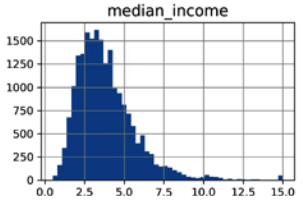

중간 소득의 대부분이 1.5~6 사이에 모여있음(교재 언급)

**계층별로 데이터셋에 충분한 샘플 수가 있지 않으면 계층의 중요도를 추정하는데 편향이 발생함**</br>
너무 많이 나누면? 충분한 샘플이 포함이 안된 계층이 존재할 수 있다.

교재에서는 5개의 소득 카테고리 특성 생성

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

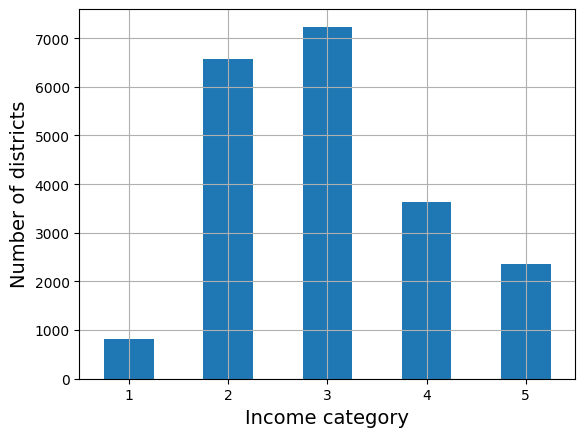

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
# save_fig("housing_income_cat_bar_plot")  # extra code
plt.show()

**소득 카테고리 기반으로 계층적 샘플링 수행 준비 완료**

**사이킷런의 StratifiedShuffleSplit을 사용**하여 주택 데이터(housing)를 계층적 샘플링(Stratified Sampling) 방식으로 훈련 세트와 테스트 세트로 나누는 작업을 수행</br>
**housing 데이터프레임의 income_cat 열을 기준으로 계층적 샘플링 실습 코드**

※ StratifiedShuffleSplit은 stratifieldKFold의 계층 샘플링과 ShuffleSplit의 랜덤 샘플링을 합친 것</br>
 &nbsp; &nbsp; &nbsp;StratifiedShuffleSplit(n_splits=1, test_size=0.2, train_size=0.6, random_state=42)처럼 훈련 세트와 테스트 세트의 합이 전체 데이터가 아니도록 설정할 수도 있음



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
# StratifiedShuffleSplit의 split 메서드는 훈련 세트와 테스트 세트로 나누는 인덱스를 반환
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

10개의 훈련 세트, 테스트 세트 생성

In [ ]:
strat_train_set, strat_test_set = strat_splits[9]

In [ ]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(16512, 11)
(4128, 11)


In [ ]:
housing.shape

(20640, 11)

테스트 세트와 훈련 세트에서 소득 카테고리 비율 확인

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


바로 위에서는 10개의 계층적 분할을 얻었는데...</br>
**단 하나의 계층적 분할을 얻기 위한 간단한 방법이 있음**</br>
: train_test_split의 stratify 매개 변수 사용

In [ ]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


계층 샘플링을 사용해 만든 테스트 세트와 일반 랜덤 샘플링으로 만든 테스트 세트 비율 비교

In [ ]:
# 추가 코드 – 그림 2–10를 생성합니다.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# 랜덤 샘플링
train_set, test_set = train_test_split(housing, test_size=0.2)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.00,0.36,0.36
2,31.88,31.88,31.10,-0.02,-2.45
3,35.06,35.05,35.56,-0.01,1.44
4,17.63,17.64,17.18,0.03,-2.58
5,11.44,11.43,12.16,-0.08,6.27


→ 랜덤 샘플링은 매번 비율이 바뀜

다음 단계로 넘어가기 전에 income_cat 특성은 주택 가격 예측에 사용하지 않으므로 삭제

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 2.4 데이터 이해를 위한 탐색과 시각화

EDA하기 전 데이터 복사본 만드는 습관

In [ ]:
housing = strat_train_set.copy()

### 2.4.1 지리적 데이터 시각화하기

위도, 경도에 따른 모든 구역 산점도

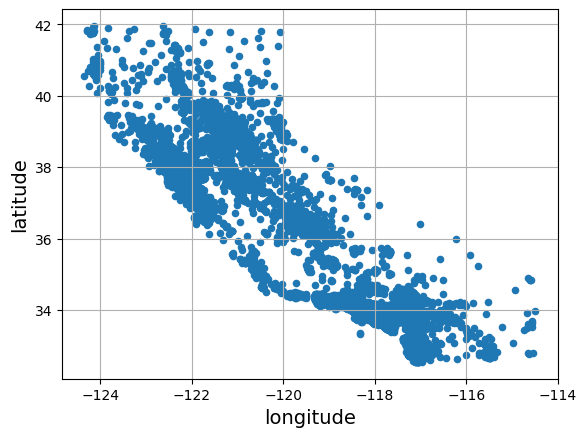

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
# save_fig("bad_visualization_plot")  # extra code
plt.show()

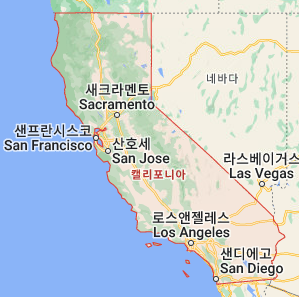

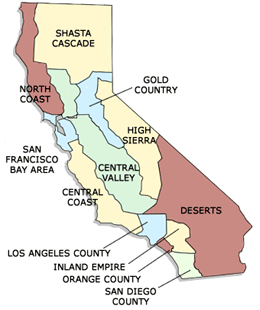

점들의 투명도를 20%로 설정하여 데이터의 밀집도를 더 잘 파악할 수 있도록 scatter 그래프 표시

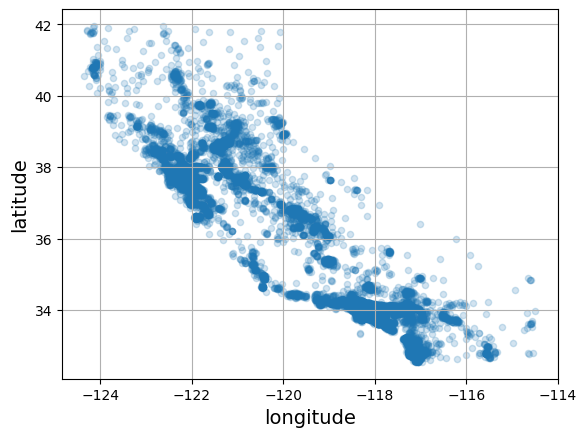

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
# save_fig("better_visualization_plot")  # extra code
plt.show()

주택 가격을 scatter 그래프에 표현</br>
- 매개변수 s(size) → 원 반지름: 인구
- 매개변수 c(color) → 색상: 가격

※ cmap은 산점도, 히트맵 등에서 색상 매핑을 위한 매개 변수, 기타 색상맵(viridis, plasma, inferno 등...)
※ jet: 낮은 값(파란색), 중간값(녹색), 높은값(빨간색)

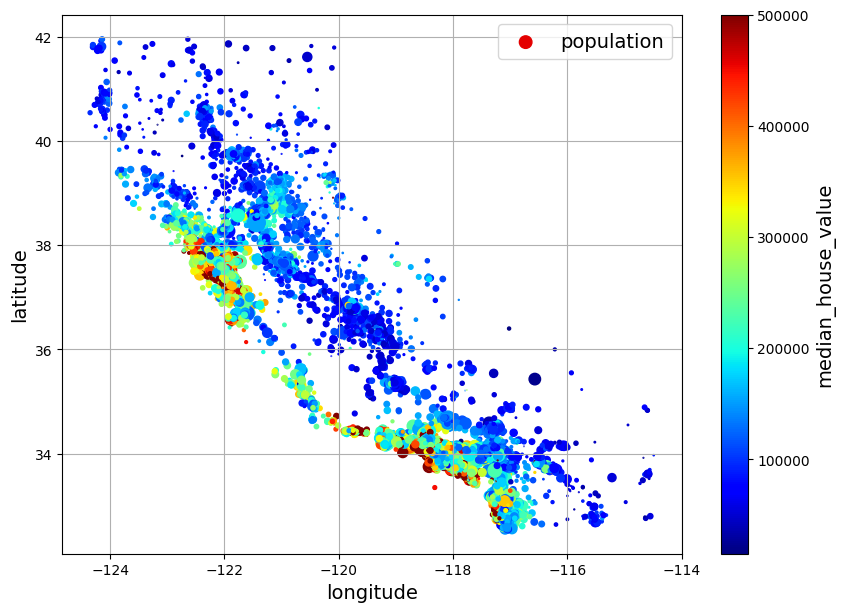

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))
# save_fig("housing_prices_scatterplot")  # extra code
plt.show()

→ 여기서 주택 가격은 지역 및 인구 밀도와 관련성이 높다는 사실 확인 가능

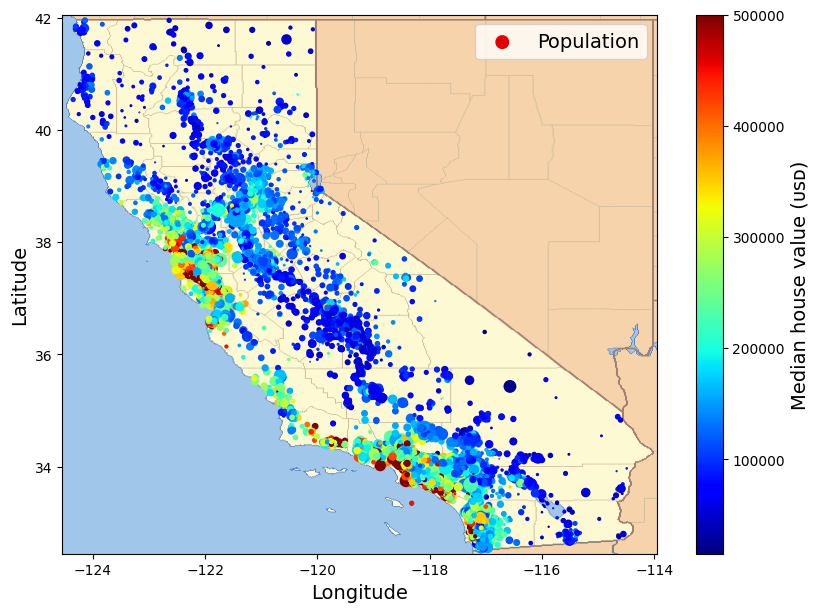

In [ ]:
# 추가 코드 – 이 셀은 이 장의 첫 번째 그림을 생성합니다
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
#  캘리포니아 이미지를 다운로드합니다
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

# save_fig("california_housing_prices_plot")
plt.show()

### 2.4.2 상관관계 조사하기

모든 특성 간의 **표준 상관계수(standard correlation coefficients, 피어슨의 r)** 계산</br>
corr() 메서드 사용</br>
참고로 corr()에서 method 매개변수에 pearson, spearman, kendall 사용 가능</br>
사용예시.</br>
corr_matrix = housing.corr(method='spearman', numeric_only=True)

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix = housing.corr(method='pearson', numeric_only=True)

중간 주택 가격과 다른 특성 사이의 상관관계 크기 확인

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


→ 중간 주택 가격과 median income은 양의 상관관계</br>
&nbsp;&nbsp;&nbsp;&nbsp; latitude는 약한 음의 상관관계(북쪽으로 갈수록 가격이 내려가는 경향)

※ 표준 상관계수(피어슨 상관계수): 두 변수 간의 **선형 관계**를 측정하는 통계적 지표, -1~1,  변수 간의 공분산을 각 변수의 표준편차로 나눈 값
- (r = 1): 두 변수 간에 완벽한 양의 선형 관계
- (r = -1): 두 변수 간에 완벽한 음의 선형 관계
- (r = 0): 두 변수 간에 선형 관계가 없음

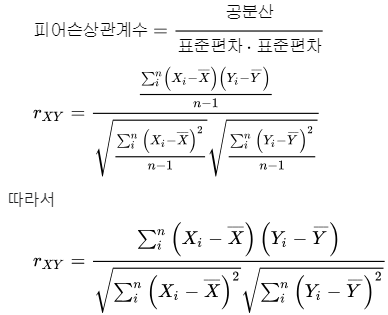

**특성 사이 상관관계를 확인하는 다른 방법: scatter_matrix 함수 사용(숫자형 특성 간 산점도)**

중간 주택 가격과 상관관계가 높아 보이는 상위 4개 특성만 확인

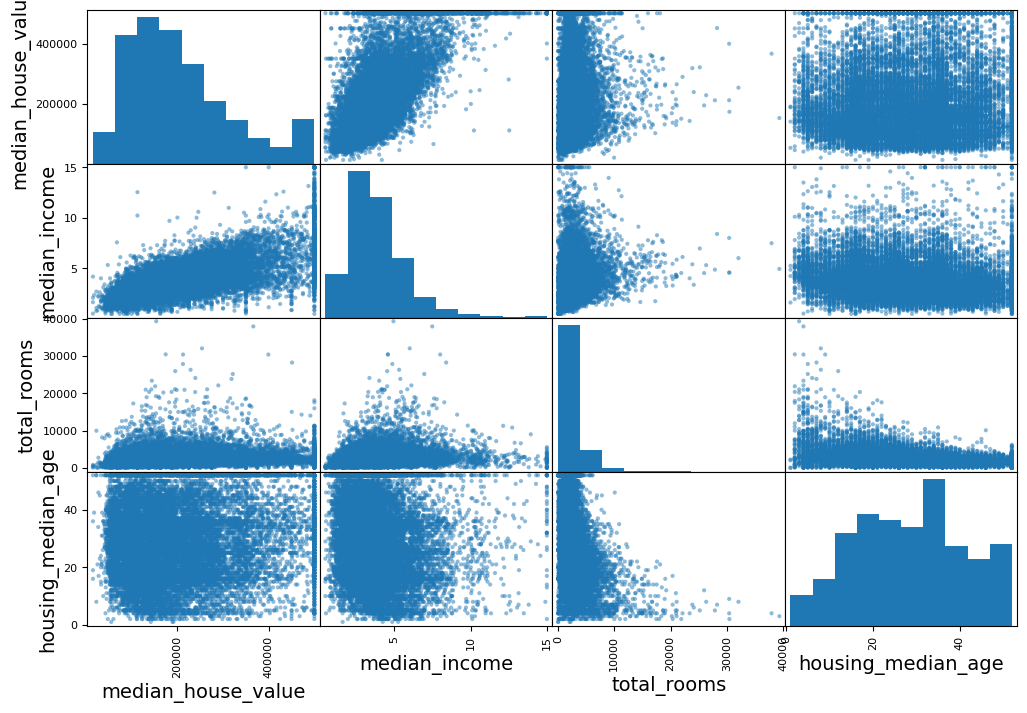

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")  # 추가 코드
plt.show()

대각선 위치에는 변수 자신에 대한 산점도 출력 → 의미 없음, 특성의 히스토그램 표시

중간 주택 가격과 중간 소득 산점도 확대

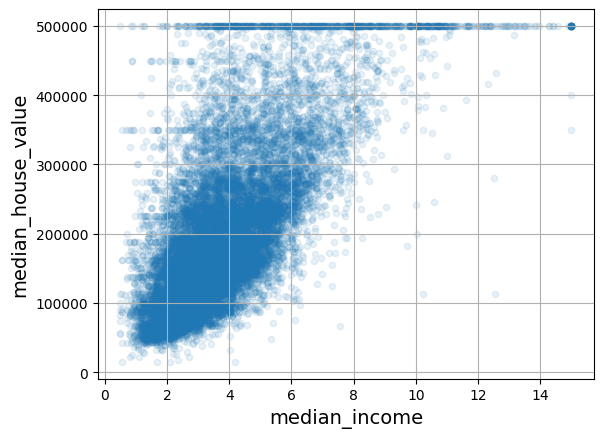

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
# save_fig("income_vs_house_value_scatterplot")  # e추가 코드
plt.show()

→ 해석
- 강한 상관관계
- 한계값이 \$500,000에서 수평선으로 보임
- \$450,000, \$350,000, \$280,000에서 수평선

수평선 영역의 데이터는 이상한 형태이므로 학습 전에 제거할 수 있음

※ 기타 상관계수에 따른 데이터 분포

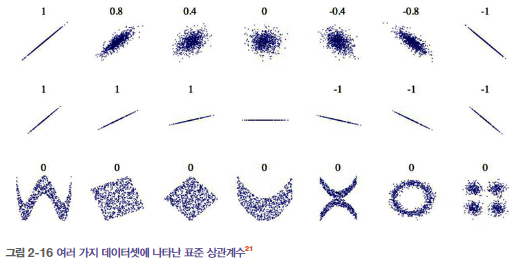

### 2.4.3 특성 조합으로 실험하기

앞 절에서
- 정제해야 할 이상한 데이터 확인
- 특성 사이 상관관계 발견
- 특성의 분포에 따른 데이터 변형 필요성 확인(오른쪽으로 꼬리 긴 경우)

추가적으로 특성의 여러 조합 확인
- 특정 구역 방 개수와 가구수
- 방 개수 당 침실 개수
- 가구당 인원

등등등

In [ ]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


**특성 조합된 데이터에서 상관관계가 높은 것이 있다...**</br>
침실/방 비율이 낮은 집이 비싼 경향

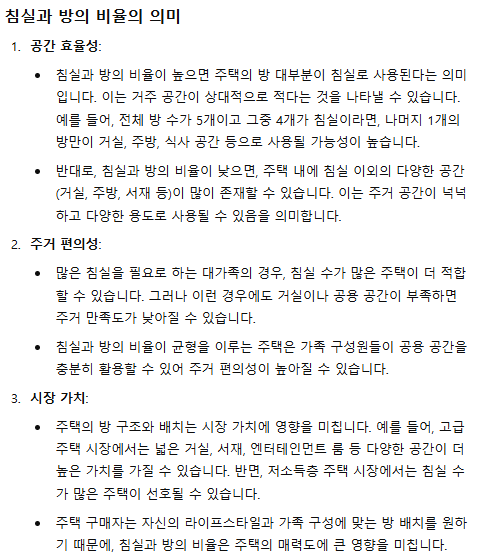

**특성 조합의 단계를 학습/테스트를 반복하며 계속 진행할 수 있다!!!**

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

데이터 준비 자동화
- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복
- 향후 프로젝트에 재사용 가능한 변환 라이브러리 점진적 구축
- 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전 자동화 함수로 변환
- 여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는데 편리

※ 원본 훈련 세트로 복원하고 타깃을 분리합니다(strat_train_set.drop()은 지정한 열을 제외한 strat_train_set의 복사본을 만듭니다. inplace=True로 지정하지 않은 한 strat_train_set 자체를 수정하지 않습니다).

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
# 타깃
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 13096 to 19888
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### 2.5.1 데이터 정제

In [ ]:
housing_org = housing.copy()

total_bedrooms에 값이 없는 경우에 대한 대응 방법
1. 해당 구역 제거 → dropna()
2. 전체 특성 삭제 → drop()
3. 대체(imputation): 누락된 값을 어떤 값으로 채움(0, 평균, 중간값) → fillna()

In [ ]:
# housing.dropna(subset=["total_bedrooms"], inplace=True)    # 옵션 1

# housing.drop("total_bedrooms", axis=1)                     # 옵션 2

# median = housing["total_bedrooms"].median()                # 옵션 3
# housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


옵션 1

In [ ]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # 옵션 1

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


옵션 2

In [ ]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # 옵션 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


옵션 3

In [ ]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # 옵션 3

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


**SimpleImputer 클래스를 사용하여 결측치를 중간값으로 대체하는 방법**

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

`"median"` 전략을 사용하기 위해 수치 특성을 분리합니다(`ocean_proximity` 같은 텍스트 특성에서는 계산할 수 없습니다):

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

imputer는 특성 중간값을 계산해 결과를 객체 statistics_ 속성에 저장

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
# 비교용
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

훈련 세트에 결측치를 중간값으로 대체</br>
단, 중간값이 total_bedrooms에만 적용되는 것이 아니라 전체에 적용된다!!!

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

strategy 매개변수에 사용될 수 있는 값:
 - mean
 - most_frequent, constant(fill_value 매개변수에 값 지정): 수치 데이터 이외에도 적용 가능

※ sklearn.impute 패키지 수치형 데이터 결측치 대체를 위한 **기타 강력한 클래스**
- KNNImputer: k-최근접 이웃의 평균으로 대체. 거리는 모든 특성을 바탕으로 계산.
- IterativeImputer: 특성마다 회귀 모델을 훈련하여 다른 모든 특성을 기반으로 결측치 예측, 업데이트된 모델로 재훈련하여 여러 번의 반복 과정을 거쳐 모델과 대체값 향상

예시.
from sklearn.impute import KNNImputer</br>
imputer = KNNImputer(n_neighbors=2)</br>
</br>
from sklearn.impute import IterativeImputer</br>
imputer = IterativeImputer(max_iter=10, random_state=0)



※ 사이킷런의 설계 철학
- 일관성
 - 추정기(estimator): fit()
 - 변환기(transformer): transform(), fit_transform()
 - 예측기(predictor): predict()
- 검사 기능: 예시 imputer.statistics_
- 클래스 남용 방지(?)
- 조합성: Pipeline 추정기
- 합리적인 기본값(default값 설정)

사이킷런 변환기는 **넘파이 배열을 출력**</br>
따라서 데이터프레임으로 복원 과정 필요

In [ ]:
type(X)

numpy.ndarray

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

널값을 중간값으로 대체했는지 확인

In [ ]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [ ]:
imputer.strategy

'median'

다시한번 결측치 있는지 확인

In [ ]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


---------------------------------

※ sklearn 사용 예시: 이상치 삭제

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)
outlier_pred

#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

array([-1,  1,  1, ...,  1,  1,  1])

-------------------------

### 2.5.2 텍스트와 범주형 특성 다루기

범주형 입력 특성인 ocean_proximity 전처리

In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


**머신러닝 알고리즘은 숫자를 다루므로 범주형 데이터를 텍스트에서 숫자로 변환 필요**

**① OrdinalEncoder를 사용하는 경우**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

categories_인스턴스로 카테고리 리스트 확인

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
type(ordinal_encoder.categories_)

list

-----------------------------------------------

In [ ]:
housing_cat.value_counts()

,count
ocean_proximity,
<1H OCEAN,7274
INLAND,5301
NEAR OCEAN,2089
NEAR BAY,1846
ISLAND,2


In [ ]:
housing_cat['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
type(housing_cat['ocean_proximity'].unique())

numpy.ndarray

-------------------------------------

**OrdinalEncoder의 한계**</br>
가까이 있는 두 값을 떨어져있는 두 값보다 더 비슷하다고 간주</br>
['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']에서</br>
'<1H OCEAN'이 4번째 'NEAR OCEAN'보다 'INLAND'와 더 비슷하다고 여긴다.</br>
단, 다른 예시 ['bad', 'average', 'good', 'excellent']의 경우에는 문제가 되지 않음

**② 원-핫 인코딩(One-hot encoding)으로 대체**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

OneHotEncoder의 출력은 사이파이 희소 행렬

In [ ]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
type(housing_cat_1hot)

scipy.sparse._csr.csr_matrix

※ 희소 행렬은 행렬을 효율적으로 저장(표현)
- 내부적으로 0이 아닌 값과 그 위치만 저장
- 행마다 하나만 1이고 나머지는 0
- 메모리 절약, 계산 속도 ↑

**희소 행렬을 데이터프레임에 사용하기 위해서는 넘파이 배열로 바꿔야 함**

*희소 행렬을 넘파이 배열로 바꾸는 방법 1*

In [ ]:
cat_encoder_sparse = OneHotEncoder(sparse_output=False)
housing_cat_1hot_numpy = cat_encoder_sparse.fit_transform(housing_cat)
type(housing_cat_1hot_numpy)

numpy.ndarray

*희소 행렬을 넘파이 배열로 바꾸는 방법 2*

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

원핫인코더의 카테고리 데이터 확인

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**③ 범주형 특성을 원-핫 표현으로 바꿔서 카테고리마다 하나의 이진 특성을 만들 수도 있음**</br>
**get_dummy()함수**

In [ ]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


**OneHotEncoder의 장점 1: 어떤 카테고리로 훈련되었는지 기억한다는 점**

In [ ]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

**OneHotEncoder의 장점 2: 알 수 없는 카테고리를 감지하고 예외 발생**

get_dummies는 아무 생각없이 변환한다.

In [ ]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


OneHotEncoder는 예외를 발생시키거나 'ignore'로 알 수 없는 카테고리를 0으로 나타낼 수 있다.

In [ ]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

**OneHotEncoder의 단점**: 카테고리 수가 많다면 원-핫 인코딩은 많은 수의 입력 특성을 생성 → 훈련 속도 저하, 성능 감소

※ OneHotEncoder의 문제가 발생할 때 대안
- 범주형 입력값을 특성과 관련된 숫자형 특성으로 대체(ocean_proximity를 '해안까지의 거리'로, 국가 코드를 인구와 1인당 GDP로)
- category_encoders 패키지 다른 인코더 사용
- 신경망을 사용해 임베딩(embedding)이라는 저차원 벡터로 변환(표현 학습, representation learning, 의 한 종류)

사이킷런 추정기(fit)는 열 이름을 feature_names_in_ 속성에 저장하고 transform, predict시 열 이름 확인

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

데이터 프레임을 만들 때 컬럼명으로 사용할 수 있는 함수

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### 2.5.3 특성 스케일과 변환

**트리 기반 알고리즘 등을 제외하고** 머신러닝은 입력된 숫자 특성들의 스케일이 많이 다르면 제대로 동작하기 어려움

예시.</br>
전체 방 개수 범위: 6\~39,320</br>
중간 소득의 범위: 0\~15</br>
이 경우 스케일링을 적용하지 않으면 대부분의 모델은 중간 소득을 무시하고 방 개수에 더 초점을 맞춤

**모든 특성의 범위를 같게 만들어주는 특성 스케일링(feature scaling) 방법**</br>
**①min-max 스케일링**과 **②표준화(standardization)**이 많이 쓰임

주의: **추정기와 마찬가지로 스케일링은 훈련 데이터로만 수행해야함**
- **훈련 세트에만 fit(), fit_transform() 메서드 사용**
- **검증 세트, 테스트 세트, 새로운 데이터에 transform만 적용**

새로운 데이터에 이상치가 있다면 스케일링된 훈련 세트 범위 밖으로 스케일링 됨</br>
exc. MinMaxScaler의 clip 매개변수를 True로 지정: 이상치가 1로 clipping

**① min-max 스케일링(정규화, normalization)**
- 특성 값을 0~1 범위로 조정
- (데이터 - 최소값) / (최대값 - 최소값)

※ 사이킷런 MinMaxScaler는 feature_range 매개변수로 범위 설정 가능(신경망은 평균이 0인 데이터에서 잘 작동하여 -1~1사이 범위가 선호됨)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

min-max 스케일링된 데이터 확인

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

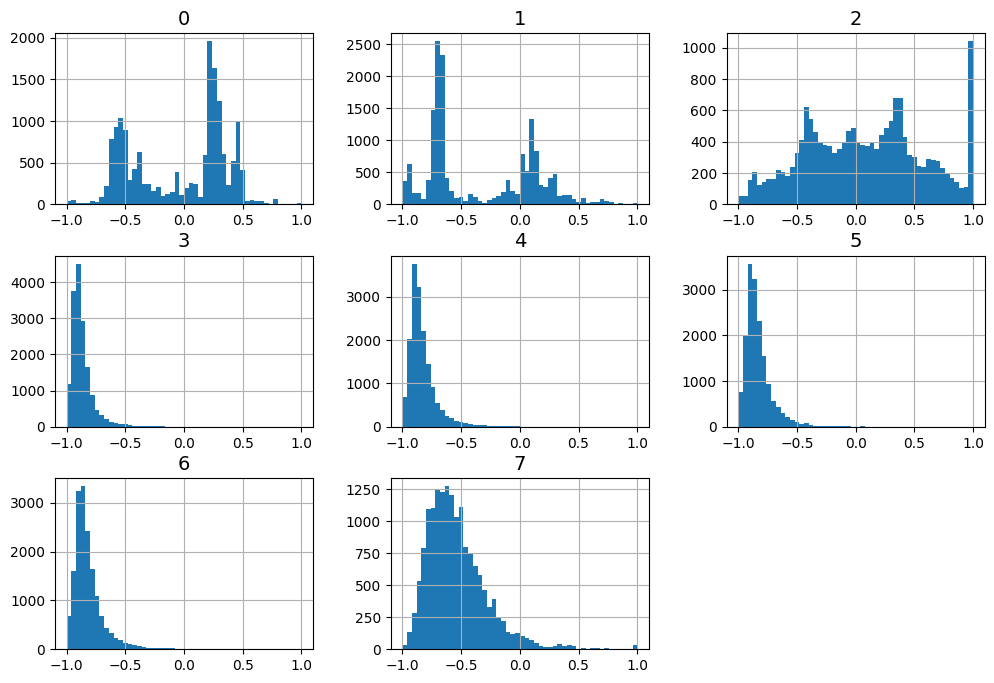

In [ ]:
import matplotlib.pyplot as plt

# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

a=pd.DataFrame(housing_num_min_max_scaled)

a.hist(bins=50, figsize=(12, 8))

**② 표준화**
- (데이터 - 평균) / 표준편차
- 표준화된 데이터는 항상 평균 0, 표준편차 1
- min-max 스케일링과 달리 특정 범위로 값을 제한하지않음
- 이상치 영향을 덜 받음</br>
 예시. 어떤 구역 중간소득 0\~15 사이가 아니라 100이면 min-max 스케일링은 100을 1로 매핑하고 다른 값을 0\~0.15로 만들어 버리지만 표준화는 이상치에 영향을 받지 않음

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

표준화된 데이터 확인

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

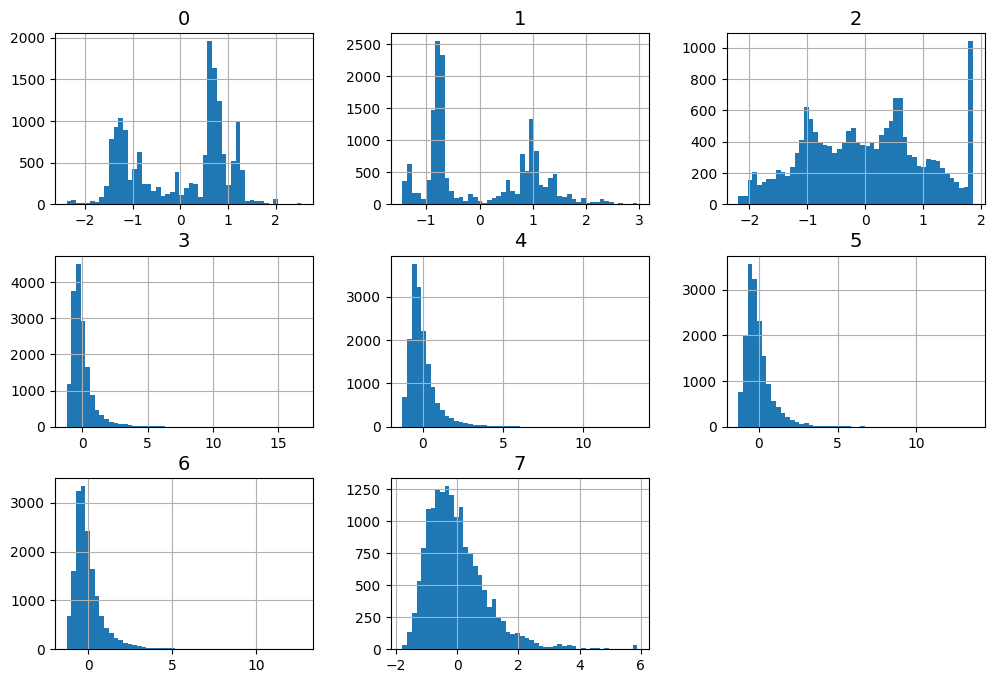

In [ ]:
import matplotlib.pyplot as plt

# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

b=pd.DataFrame(housing_num_std_scaled)

b.hist(bins=50, figsize=(12, 8))

**특성 분포 꼬리가 두꺼울 때(평균에서 멀리 떨어진 값이 지수적으로 줄어들지 않는 경우)**</br>
→ min-max 스케일링이나 표준화는 대부분의 값을 작은 범위로 압축</br>
→ 머신러닝에서 문제가 됨</br>
→ 특성을 스케일링하기 전에 두꺼운 꼬리를 줄이도록 데이터를 변환하고 분포가 대략적으로 대칭이 되도록 변환</br>
→ 특성을 제곱근이나 로그값으로 바꾸는 방법 적용

히스토그램에서 보다시피 population 특성은 대략적으로 멱법칙(한 수가 다른 수의 거듭제곱으로 표현되는 두 수의 함수적 관계)을 따름</br>
특정 인구수를 가지는 도시들의 숫자는 인구수의 거듭제곱에 반비례

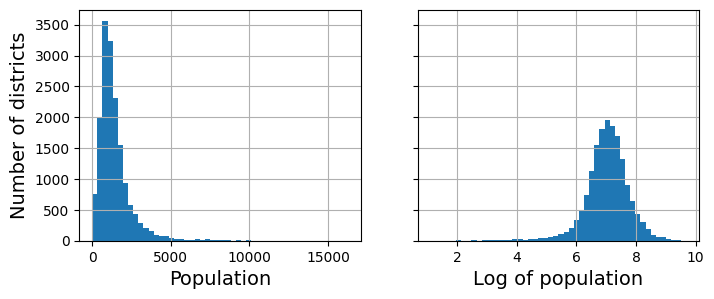

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
# save_fig("long_tail_plot")
plt.show()

→ (그래프로는 잘 나타나지 않으나) 10,000명의 구역이 1,000명의 구역보다 10배 낮다.

**꼬리가 두꺼운 특성을 처리하는 다른 방법: 버킷타이징(bucketizing)**

분포를 거의 동일한 크기의 버킷으로 자르고 income_cat 특성을 만들었던 것 처럼 비슷하게 특성값을 해당하는 버킷의 인덱스로 바꿈

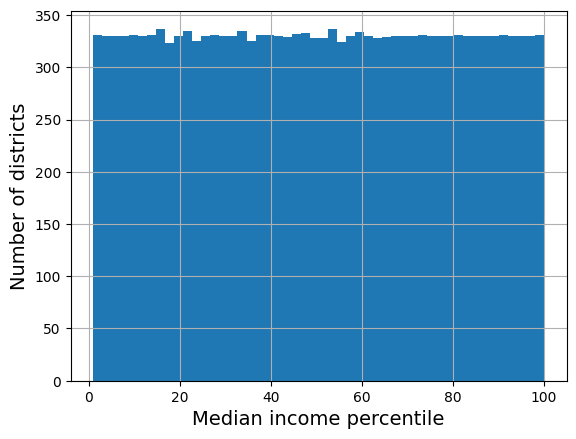

In [ ]:
# 추가 코드 – 균등 분포를 얻는다는 것을 보여줍니다
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: 1 백분위수 아래의 소득은 1로 레이블되고 99 백분위수 이상의 값은 100으로 레이블됩니다.
# 이 때문에 아래 분포의 범위가 1에서부터 100까지입니다(0에서부터 100까지가 아닙니다).

→ median income 구간 데이터를 균등하게 나눔

버킷타이징은 멀티모달 분포에도 도움이 될 수 있음</br>
housing_median_age처럼 멀티모달 분포(mode라는 정점이 두 개 이상 나타나는 분포)에도 버킷타이징이 도움이 될 수 있음(설명 생략)</br>
</br>
멀티모달 분포를 변환하는 다른 방법으로 **중간 주택 연도와 특정 모드 사이의 유사도를 나타내는 특성 추가**</br>
유사도 측정은 일반적으로 입력값과 고정 포인트 사이의 거리에만 의존하는 방사기저함수(Radial Basis Function, RBF) 사용</br>
가장 널리 사용되는 RBF는 입력값이 고정 포인트에서 멀어질수록 출력값이 지수적으로 감소하는 가우스 RBF


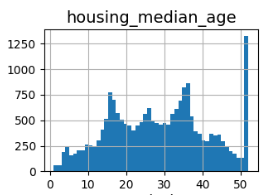

주택 연도 x와 35사이에 가우스 RBF 유사도

image.png

age_simil_35 특성

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

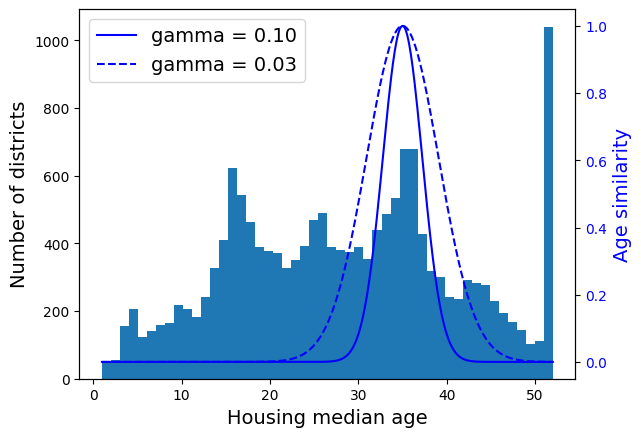

In [ ]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
# save_fig("age_similarity_plot")
plt.show()

**타깃값도 변환 가능**</br>
타깃 분포의 꼬리가 두껍다면 타킷을 로그값으로 변환</br>
이 로그로 변환된 타깃값으로 훈련된 모델이 예측을 하면 중간 주택 가격의 로그를 예측하므로 가격 값을 얻기 위해 예측 값에 지수함수를 적용해야 함

In [ ]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Index: 16512 entries, 13096 to 19888
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 774.0 KB


target에 StandardScaler 적용

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # 새로운 데이터라고 가정합니다

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

예측 값에 inverse_transform 적용

In [ ]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

더 간단한 방법</br>
TransformedTargetRegressor 사용하여 타킷 레이블을 스케일링하여 훈련(fit)시키고 예측(predict)시 모델 내부에서 inverse_transform()을 사용하여 예측 생성

In [ ]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

In [ ]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

여기까지는 사이킷런에서 제공하는 변환기를 소개

### 2.5.4 사용자 정의 변환기

사이킷런 변환기 이외의 변환기 작성

**어떤 훈련도 필요하지않는 변환기 FunctionTransformer 사용 예시**</br>
① 특성 분포의 꼬리가 두꺼울 때 로그값으로 변환하는 변환기

In [ ]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

※ inverse_func 매개변수는 선택 사항(써도 되고 안해도 되고)

② 사용자 정의 변환 함수는 추가적인 인수로 하이퍼파라미터를 받을 수 있음</br>
예를 들어 RBF 유사도를 계산하는 변환기는 아래와 같음

In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [ ]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

③ 두 개의 특성을 가진 배열을 전달하면 유사도를 측정하기 위해 유클리드 거리 계산</br>
각 구역과 샌프란시스코 사이의 지리적 유사도를 측정하는 특성 추가 코드

In [ ]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [ ]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

④ 특성을 합칠 때도 사용자 정의 함수가 유용</br>
첫 번째 입력 특성과 두 번째 특성 사이의 비율을 계산

In [ ]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

**fit() 메서드에서 특정 파라미터를 학습하고 나중에 transform() 메서드를 이를 사용하기 위한 사용자 정의 클래스 작성하는 경우**

 특정 클래스를 상속할 필요없고 fit(), transform(), fit_transform() 메서드만 만들어주면 된다.</br>
단, fit_transform() 메서드는 TransformMixin을 상속하면 자동 생성됨</br>
BaseEstimator를 상속하고 생성자에 \*args나 \**kwargs를 사용하지 않으면 하이퍼파라미터 튜닝에 필요한 get_params()와 set_params()를 얻게 됨

※ 사이킷런은 덕 타이핑 방식

다음은 StandardScaler와 비슷하게 작동하는 사용자 정의 변환기

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # *args나 **kwargs를 사용하지 않습니다!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # 사용하지 않더라도 y를 넣어 주어야 합니다
        X = check_array(X)  # X가 부동소수점 배열인지 확인합니다
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # 모든 추정기는 fit()에서 이를 저장합니다.
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        check_is_fitted(self)  # (훈련으로) 학습된 속성이 있는지 확인합니다
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

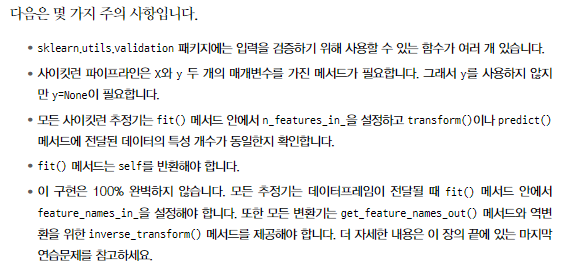

하나의 사용자 변환기가 다른 추정기를 포함할 수 있음</br>
fit() 메서드 안에 훈련 데이터에 있는 핵심 클러스터를 식별하기 위한 KMeans 클래스 사용</br>
transform() 메서드에서 rbf_kernel()을 사용해 각 샘플이 클러스터 중심과 얼마나 유사한지 측정

In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # 사이킷런 1.2버전에서 최상의 결과를 찾기 위해 반복하는 횟수를 지정하는 `n_init` 매개변수 값에 `'auto'`가 추가되었습니다.
        # `n_init='auto'`로 지정하면 초기화 방법을 지정하는 `init='random'`일 때 10, `init='k-means++'`일 때 1이 됩니다.
        # 사이킷런 1.4버전에서 `n_init`의 기본값이 10에서 `'auto'`로 바뀝니다. 경고를 피하기 위해 `n_init=10`으로 지정합니다.
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]

※ 개발시 참고사항: sklearn.utils.estimator_checks 모듈의 check_estimator()로 사이킷런 API 준수 여부 확인 가능

ClusterSimilarity 사용 예시</br>
k-평균 클러스터를 찾고 각 구역과 10개의 클러스터 중심 사이의 가우스 RBF 유사도 측정

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

In [ ]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

→ 구역이 하나의 행, 열이 10개 클러스터 중심 사이의 가우스 유사도

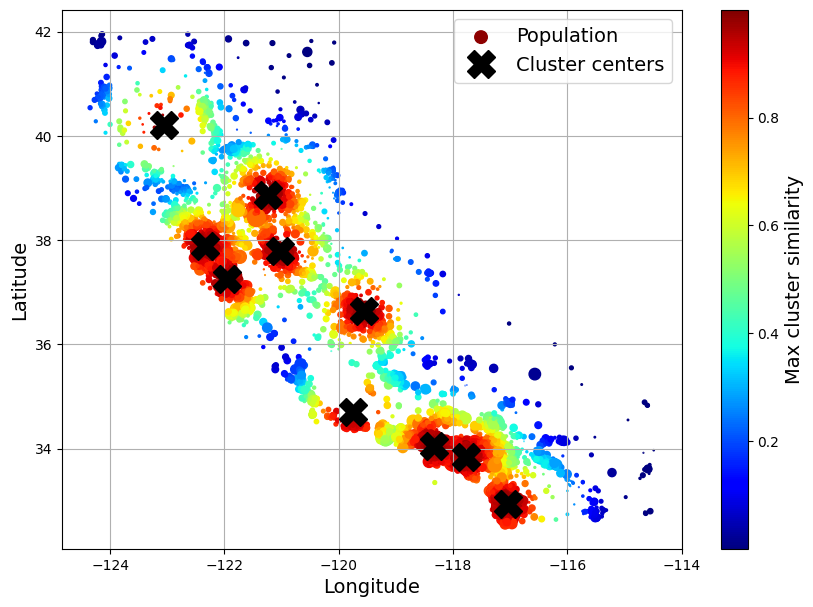

In [ ]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
# save_fig("district_cluster_plot")
plt.show()

k-평균으로 찾은 클러스터 10개의 중심</br>
구역의 색은 클러스터 중심과의 지리적 유사도</br>
인구가 많고 비싼 지역에 클러스터 위치

### 2.5.5 변환 파이프라인

앞서 보았듯이 변환 단계는 올바른 순서대로 실행되어야함(예. 스케일링하고 모델 학습하고...)</br>
**사이킷런 Pipeline클래스: 변환을 순서대로 처리하는 기능**</br>
Pipeline은 이름/추정기 쌍(튜플)의 리스트를 받음

수치 특성 결측치 대체 및 스케일 조정하는 파이프라인 예시

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

Pipeline은 튜플 원소의 리스트를 입력</br>
※ Pipeline은 내부적으로 이중 밑줄(__)을 사용하여 하이퍼파라미터를 참조하고 설정하도록 하고 있기 때문에 이름에는 사용하지 말아야 함</br>
잘못 사용 예시

pipeline = Pipeline([
    ('scaler__step', StandardScaler()),
    ('classifier__step', LogisticRegression())
])


param_grid = {
    'scaler__step__with_mean': [True, False],
    'classifier__step__C': [0.1, 1, 10]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=3)

※ 모든 사이킷런 추정기가 다이어그램으로 표현되는 방법

In [ ]:
from sklearn import set_config
sklearn.set_config(display="diagram")
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

주의. Pipeline 안에서 추정기는 마지막 추정기를 제외하고는 모두 변환기(fit, transform메서드를 가져야함)여야 함</br>
- transform() 메서드가 없는 추정기(Estimator)의 예시</br>
 - 분류기 (Classifier): LogisticRegression, KNeighborsClassifier, SVC,RandomForestClassifier</br>
 - 회귀기 (Regressor): LinearRegression, Ridge, Lasso, DecisionTreeRegressor

**Pipeline안에 이름을 적기 싫으면 make_pipeline() 함수 사용**

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

**파이프라인의 fit() 메서드 호출하면**</br>
...예를 들어 num_pipeline.fit(...) 하면...</br>
**모든 변환기의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달**</br>
**마지막 단계에서는 fit()메서드만 호출**

파이프라인 객체는 마지막 추정기와 동일한 메서드를 제공</br>
마지막이
- 변환기라면 파이프 라인은 transform()메서드 사용,
- 예측기(분류기, 회귀기)라면 파이프 라인은 predict() 메서드를 사용할 수 있음

fit_transform() 메서드 호출하고 처음 두 행의 출력을 소수점 둘째자리에서 반올림한 결과 확인

In [ ]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [ ]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

**데이터 프레임으로 재구성하기 위해서는**</br>
**파이프라인의 get_feature_names_out() 메서드 사용**

In [ ]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


※ 파이프라인은 인덱싱을 지원</br>
- pipeline[1]: 파이프라인의 두 번째 추정기 반환
- pipeline[:-1]: 마지막 추정기를 제외한 모든 추정기를 담은 파이프라인 객체를 반환
- 이름/추정기 쌍의 리스트인 steps 속성을 통해 추정기 참조
- 이름과 추정기를 매핑한 딕셔너리인 named_steps 속성 사용
 - num_pipline["simpleimputer"]
 - 다른 예시. pipeline.named_steps['scaler']

In [ ]:
num_pipeline[1]

StandardScaler()

In [ ]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [ ]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [ ]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

**하나의 변환기로 각 열마다 적절한 변환을 적용하면 편리함**</br>
수치형 특성과 범주형 특성 각각에 변환 적용

In [ ]:
from sklearn.compose import ColumnTransformer

# 수치형 특성명
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
# 범주형 특성명
cat_attribs = ["ocean_proximity"]

# 범주형 특성을 원핫인코딩하는 파이프라인
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# 튜플: 이름, 변환기, 변환기가 적용될 열 이름
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

**더 간단하게 변환하는 방법**</br>
사이킷런은 주어진 타입의 모든 특성을 자동으로 선택해주는 make_column_selector 클래스 제공</br>
make_pipeline()처럼 자동으로 이름을 지정하는 make_column_transformer()함수도 있음


In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

변환 결과를 데이터 프레임으로...

In [ ]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


**지금까지 실험한 모든 변환을 수행할 단일 파이프라인 만들기**

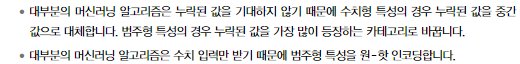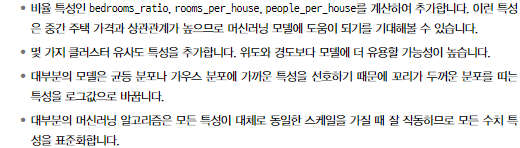

In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # get_feature_names_out에 사용

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # 남은 특성: housing_median_age

In [ ]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__클러스터 0 유사도', 'geo__클러스터 1 유사도',
       'geo__클러스터 2 유사도', 'geo__클러스터 3 유사도', 'geo__클러스터 4 유사도',
       'geo__클러스터 5 유사도', 'geo__클러스터 6 유사도', 'geo__클러스터 7 유사도',
       'geo__클러스터 8 유사도', 'geo__클러스터 9 유사도',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age'],
      dtype=object)

In [ ]:
type(housing_prepared)

numpy.ndarray

→ 24개의 특성을 가진 넘파이 배열이 출력됨

## 2.6 모델 선택과 훈련

지금까지
1. 문제 정의
2. 데이터 수집 및 탐색
3. 훈련 세트, 테스트 세트 분리
4. 머신러닝 알고리즘에 주입할 데이터 정제하는 전처리 파이프라인 작성

하였고,</br>
이제 훈련시킬 차례

### 2.6.1 훈련 세트에서 훈련하고 평가하기

**간단한 선형 회귀 모델 훈련**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x794...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7942af215db0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = 십의 자리에서 반올림

array([242800., 375900., 127500.,  99400., 324600.])

In [ ]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [ ]:
# 추가 코드 – 책에서 언급한 에러 비율을 계산합니다
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-47.0%, -22.3%, 25.4%, 3.4%, -10.3%


**간단한 선형 회귀 모델을 RMSE를 사용하여 성능 측정**

In [ ]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

68647.95686706658

- → 대부분 구역의 중간 주택 가격은 \$120,000~\$265,000 사이인데 rmse가 너무 크다.
- → 모델이 훈련 데이터에 과소적합됨
 - 해결책: 강력한 모델 선택, 훈련 알고리즘에 더좋은 특성 주입, *모델 규제 감소*

※ mean_squared_error함수에서 squared 매개변수는 제곱 평균 오차(MSE, Mean Squared Error)와 루트 평균 제곱 오차(RMSE, Root Mean Squared Error) 사이를 선택하는 데 사용

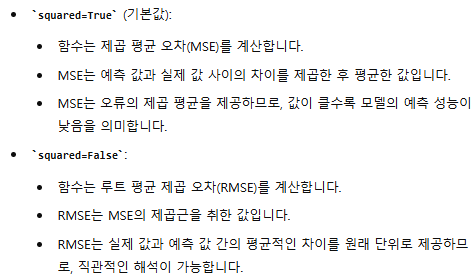

**좀더 강력한 모델인 DecisionTreeRegressor로 훈련**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x794...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7942af215db0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

훈련 데이터로 예측해보니...

→ 오차가 없다? 과대적합 가능성이 높음

모델을 평가해야 된다...

### 2.6.2 교차 검증으로 평가하기

앞의 결정 트리 모델을 평가하는 방법
- train_test_split 함수로 훈련 세트를 다시 훈련 세트와 검증 세트로 나누고 학습 및 검증하여 모델 평가

사이킷런의 K-폴드 교차 검증(K-fold cross-validation)

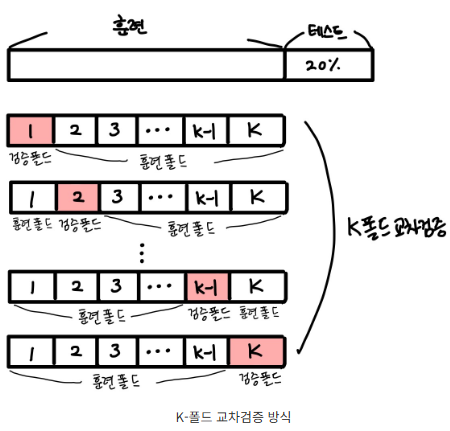

10개 서브셋으로 랜덤 분할하고 결정 트리 모델을 10번 훈련하고 평가(9개 서브셋은 훈련, 1개는 평가)

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

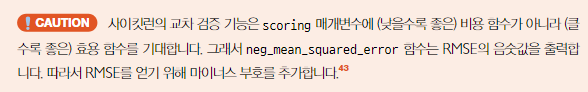

In [ ]:
type(tree_rmses)

numpy.ndarray

10개의 교차 검증 결과가 나오는데...

In [ ]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,67153.318273
std,1963.580924
min,63925.253106
25%,66083.277180
50%,66795.829871
75%,68074.018403
max,70664.635833


→ 결과가 선형 회귀 모델과 비슷

In [ ]:
# 추가 코드 – 선형 모델의 점수를 계산합니다
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,69847.923224
std,4078.407329
min,65659.761079
25%,68088.799156
50%,68697.591463
75%,69800.966364
max,80685.254832


트리 모델은 훈련 오차가 작고 검증 오차는 높으므로 과대적합임

※ 교차 검증은 모델을 여러 번 훈련시켜야 해서 비용이 높아 항상 쓸 수 있는 것은 아님.</br>
하지만 위 방법에서 검증 세트를 하나만 사용했다면 RMSE 통계적 데이터를 알 수가 없음

**RandomForestRegressor 모델로 훈련**</br>
특성을 랜덤으로 선택해서 많은 결정 트리를 만들고 예측의 평균을 구하는 방식</br>
(서로 다른 모델들로 부터 예측을 조합하는 방식은 앙상블이라 불림)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,47002.931706
std,1048.451340
min,45667.064036
25%,46494.358345
50%,47093.173938
75%,47274.873814
max,49354.705514


교차 검증으로 측정한 RMSE(검증 에러)와 훈련 세트로 측정한 RMSE(훈련 에러)를 비교

In [ ]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = mean_squared_error(housing_labels, housing_predictions,
                                 squared=False)
forest_rmse

17547.52124624957

→ 훈련 에러가 검증 에러 보다 훨씬 낮기 때문에 여전히 모델이 훈련 세트에 과대적합되었다는 의미

과대적합 개선 방안:
- 모델 단순화
- 규제 적용
- 더 많은 훈련 데이터 모으는 것

**하이퍼파라미터 조정에 너무 많은 시간을 들이지 않고 여러 종류의 머신러신 모델(서포트 벡터 머신, 신경망 등)을 시도하여 가능성 있는 모델 선정**

## 2.7 모델 미세 튜닝

가능성 있는 모델을 찾으면 이 모델의 성능을 더 높이기 위해 하이퍼파라미터를 바꿔가며 미세튜닝해야 함

※ 하이퍼파라미터(hyperparameter)
- 머신러닝 모델의 학습 과정에서 사용자가 직접 설정해야 하는 변수
- 하이퍼파라미터는 모델의 성능과 효율성에 큰 영향
- 범주
 - 모델 하이퍼파라미터: 모델의 구조를 정의하는 변수, 신경망의 레이어 수, 각 레이어의 뉴런 수, 활성화 함수의 종류 등
 - 학습 하이퍼파라미터: 모델 학습 과정에서 사용되는 변수, 학습률(learning rate), 배치 크기(batch size), 에포크 수(epoch) 등

### 2.7.1 그리드 서치

**가장 만족할만한 하이퍼파라미터 조합을 찾는 방**법</br>
**가능한 하이퍼파라미터 조합을 시도하여 최적의 조합을 찾는 방법**

사이킷런의 GridSearchCV 사용
- 하이퍼파라미터와 값을 지정하면 교차 검증을 사용해 가능한 모든 하이퍼파라미터 조합을 평가

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7942af215db0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

파이프라인이나 ColumnTransformer내 추정기의 **모든 하이퍼파라미터 지정 가능**</br>
GridSearch 동작 예시. preprocessing__geo__n_clusters
- preprocessing 추정기를 찾고(ColumnTransformer)
- ColumnTransformer내 "geo"라는 이름의 변환기 찾고(ClusterSimilarity)
- ClusterSimilarity의 n_cluster 하이퍼파라미터를 찾아
- [5, 8, 10] 순차적 반영

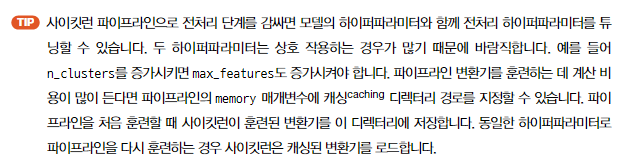

**GridSearch 훈련 실행 횟수**
1. param_grid의 첫번째 딕셔너리의 하이퍼파리미터 조합 3x3=9개 평가
2. 두번째 딕셔너리의 하이퍼파리미터 조합 2x3=6개 평가
3. GridSearchCVdml cv가 3이므로 3-폴드 교차 검증 진행

(9+5)x3 = 45번 훈련 발생

-----------------------------------

full_pipeline.get_params().keys()를 사용해 전체 하이퍼파라미터 리스트를 얻을 수 있음

In [ ]:
# 추가 코드 – get_params().keys() 출력의 일부를 보여 줍니다
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'prepr

-----------------------------

**최상의 하이퍼파라미터 조합**

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

15는 탐색범위의 최대값이므로 더 큰 값을 지정하여 다시 검색하면 점수가 향상 될 수도 있음

**최상의 추정기 확인**

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7942af2...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7942af2783a0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

GridSearchCV가 refit=True로 초기화되었다면 **교차 검증으로 최적의 추정기를 찾은 다음 전체 훈련 세트로 다시 훈련시킴**

**그리드 탐색에서 테스트한 하이퍼파라미터 조합의 점수를 확인**

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 추가 코드 – 데이터프레임을 깔끔하게 출력하기 위한 코드입니다
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43536,43753,44569,43953
13,15,8,44084,44205,44863,44384
14,15,10,44368,44496,45200,44688
7,10,6,44251,44628,45857,44912
9,10,6,44251,44628,45857,44912


베스트 모델의 평균 테스트 RMSE 43953</br>
기본 하이퍼파라미터 사용했을 때 RMSE 47002

### 2.7.2 랜덤 서치

그리드 서치 방법은 비교적 적은 수 조합을 탐구할 때 좋음</br>
**하이퍼파라미터 탐색 공간이 커지면 RandomizedSearchCV 선호**</br>
그리드 서치와 달리, **지정된 하이퍼파라미터 공간에서 무작위로 샘플링하여 최적의 하이퍼파라미터 조합**</br>
동일한 조합이 다시 선택될 확률은 매우 낮지만, 완전히 배제할 수는 없다고 함

**RandomizedSearchCV 장점**

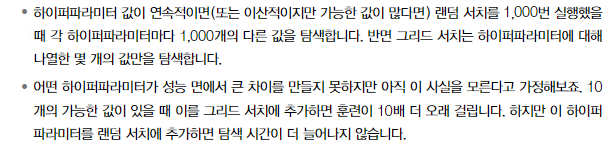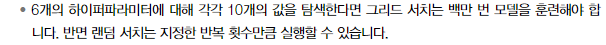

설명예시.
- 그리드 서치</br>
기존 하이퍼파라미터: A (3개의 값), B (4개의 값)
조합 수: 3 x 4 = 12
새로운 하이퍼파라미터 C (10개의 값)를 추가하면:</br>
조합 수: 3 x 4 x 10 = 120
즉, 조합의 수가 10배로 증가


- 랜덤 서치</br>
기존 하이퍼파라미터: A (3개의 값), B (4개의 값)
샘플링 횟수: n_iter = 10 (예시)
새로운 하이퍼파라미터 C (10개의 값)를 추가해도:</br>
샘플링 횟수: n_iter = 10 (변하지 않음)

| 특징                | GridSearchCV                                                                 | RandomizedSearchCV                                                      |
|-------------------------|----------------------------------------------------------------------------------|----------------------------------------------------------------------------|
| 탐색 방식           | 모든 가능한 하이퍼파라미터 조합을 시도                                           | 지정된 횟수만큼 무작위로 하이퍼파라미터 조합을 샘플링                      |
| 포괄성              | 매우 높음 (최적의 조합을 놓치지 않음)                                             | 중간 (최적의 조합을 놓칠 가능성 있음)                                      |
| 계산 비용           | 매우 높음 (하이퍼파라미터 공간이 클수록 기하급수적으로 증가)                      | 상대적으로 낮음 (샘플링 횟수에 따라 조절 가능)                             |
| 효율성              | 낮음 (모든 조합을 시도하므로 비효율적일 수 있음)                                   | 높음 (빠르게 탐색 가능)                                                    |
| 재현성              | 높음 (동일한 하이퍼파라미터 그리드를 사용하면 항상 동일한 결과)                   | 중간 (무작위 샘플링이므로 결과가 다를 수 있지만, random_state로 조절 가능)|
| 적용 상황           | 하이퍼파라미터 공간이 작고 계산 비용이 문제가 되지 않는 경우                      | 하이퍼파라미터 공간이 크고 계산 비용이 중요한 경우                         |
| 설정 복잡도         | 중간 (모든 하이퍼파라미터 조합을 명시적으로 정의해야 함)                           | 낮음 (하이퍼파라미터 범위만 정의하면 됨)                                   |
| 최적화 가능성       | 높음 (모든 조합을 시도하므로 최적의 조합을 찾을 가능성이 높음)                     | 중간 (무작위 샘플링이므로 최적의 조합을 놓칠 가능성 있음)                  |

랜덤 서치 코드

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7942af27a3b0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7942af27a2f0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

**HalvingRandomSearchCV와 HalvingGridSearchCV 하이퍼파라미터 탐색 클래스**</br>
 - 점진적 탐색(Progressive Search) 기법을 사용하여 효율적으로 최적의 하이퍼파라미터 search
 - HalvingGridSearchCV
  - 그리드 서치(Grid Search)와 점진적 탐색을 결합한 방법
  - 초기 단계에서 많은 하이퍼파라미터 조합을 시도하고, 각 단계에서 성능이 좋은 조합만을 선택하여 다음 단계로 진행
  - 계산 비용을 줄이면서도 최적의 하이퍼파라미터 search

- HalvingRandomSearchCV
 - 랜덤 서치(Random Search)와 점진적 탐색을 결합한 방법
 - 무작위로 하이퍼파라미터 조합을 샘플링하여 탐색
 - 하이퍼파라미터 공간이 매우 클 때도 효율적으로 탐색

요점은 다음 단계 진행 전 성능이 좋은 상위 조합을 선택하여 다음 단계로 진행

예시 코드: HalvingGridSearchCV만...

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로드 및 분할
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 모델 및 하이퍼파라미터 그리드 정의
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# HalvingGridSearchCV 설정 및 학습
# factor=2는 다음 단계에서 자원을 두 배 할당
halving_grid_search = HalvingGridSearchCV(rf, param_grid, factor=2, random_state=42)
halving_grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters (HalvingGridSearchCV):", halving_grid_search.best_params_)

Best Hyperparameters (HalvingGridSearchCV): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


**단계 수 계산 설명**</br>
초기 자원 할당: min_resources는 기본적으로 데이터셋의 크기와 모델의 복잡도에 따라 자동으로 설정</br> 예를 들어, 데이터셋의 크기가 1000이고, min_resources가 10으로 설정되었다고 가정</br>
자원 증가: 각 단계에서 자원은 factor 값에 따라 증가</br>
여기서는 factor=2이므로, 자원은 각 단계에서 두 배로 증가</br>
단계 수 계산: 초기 자원 할당에서 시작하여, 자원이 최대 자원(max_resources)에 도달할 때까지 factor 값에 따라 증가하는 단계 수를 계산</br>
예를 들어, 초기 자원 할당이 10이고, 최대 자원이 1000인 경우:</br>

단계 1: 10개의 자원 사용</br>
단계 2: 20개의 자원 사용 (10 * 2)</br>
단계 3: 40개의 자원 사용 (20 * 2)</br>
단계 4: 80개의 자원 사용 (40 * 2)</br>
단계 5: 160개의 자원 사용 (80 * 2)</br>
단계 6: 320개의 자원 사용 (160 * 2)</br>
단계 7: 640개의 자원 사용 (320 * 2)</br>
단계 8: 1280개의 자원 사용 (640 * 2) -> 최대 자원을 초과하므로 종료</br>
→ 이 경우 단계 수는 7단계

※ min_resources_ 를 사용해 HalvingGridSearchCV가 자동으로 설정한 초기 자원 할당 값 확인 가능</br>
※ min_resources 초기 할당 가능</br>
halving_grid_search = HalvingGridSearchCV(rf, param_grid, factor=2, min_resources=20, random_state=42)

In [ ]:
print("min_resources:", halving_grid_search.min_resources_)

min_resources: 30


### 2.7.3 앙상블 방법

랜덤 포레스트는 결정 트리의 앙상블 방법임</br>
→ 결정 트리 하나보다 더 성능이 좋은 것 처럼 </br>
&nbsp;&nbsp;&nbsp;&nbsp;최상의 단일 모델 보다 모델 그룹이 **더 나은 성능을 발휘할 때가 많음**

### 2.7.4 최상의 모델과 오차 분석

정확한 예측을 위한** 특성의 상대적인 중요도를 알려주는 모델**들이 있음</br>
RandomForestRegressor 예시</br>
feature_importances_ 사용

In [ ]:
final_model = rnd_search.best_estimator_  # 전처리 포함됨
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.02,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [ ]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1898423270105783, 'log__median_income'),
 (0.07709175866873944, 'cat__ocean_proximity_INLAND'),
 (0.06455488601956336, 'bedrooms__ratio'),
 (0.056936146643377976, 'rooms_per_house__ratio'),
 (0.0490294770805355, 'people_per_house__ratio'),
 (0.03807069074492323, 'geo__클러스터 3 유사도'),
 (0.025643913400094476, 'geo__클러스터 22 유사도'),
 (0.02179127543243723, 'geo__클러스터 17 유사도'),
 (0.021575251507503695, 'geo__클러스터 6 유사도'),
 (0.017868654556924362, 'geo__클러스터 2 유사도'),
 (0.017431400050755975, 'geo__클러스터 32 유사도'),
 (0.015981159400591683, 'geo__클러스터 18 유사도'),
 (0.01488846425739688, 'geo__클러스터 40 유사도'),
 (0.014488389218107143, 'geo__클러스터 43 유사도'),
 (0.014252940099964142, 'geo__클러스터 7 유사도'),
 (0.014038173319370725, 'geo__클러스터 21 유사도'),
 (0.013846025114732157, 'geo__클러스터 38 유사도'),
 (0.01362570996472274, 'geo__클러스터 34 유사도'),
 (0.013547297167034428, 'geo__클러스터 41 유사도'),
 (0.012900089026066918, 'geo__클러스터 24 유사도'),
 (0.012620908145579916, 'geo__클러스터 10 유사도'),
 (0.011621275372313349, 'remainder__housing_

**위 정보를 바탕으로 덜 중요한 특성은 제외 가능**

### 2.7.5 테스트 세트로 시스템 평가하기

테스트 세트에서 최종 모델 평가

In [ ]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41549.20158097943


점 추정이 신뢰할 만한 것인가를 확인하면 좋다...
테스트 RMSE에 대한 95% 신뢰 구간을 계산

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39395.35475927, 43596.76969025])

In [ ]:
# 추가 코드 – RMSE에 대한 신뢰 구간 계산 방법
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(39395.35475926931, 43596.76969025394)

In [ ]:
# 추가 코드 – z-점수를 사용해 신뢰 구간 계산하기
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(39396.00369767951, 43596.18328117898)

하이퍼파라미터 튜닝을 많이 했다면 교차 검증을 사용해 측정한 것보다 성능이 조금 낮은 것이 보통</br>
새로운 데이터셋에 잘 동작하지 않을수도...</br>

## 2.8 론칭, 모니터링, 시스템 유지 보수

제품 시스템에 적용하기 위한 준비 단계(코드 정리, 문서, 테스트 케이스 작성 등) 이후 모델을 제품 환경에 배포

**모델이 준비가 되었다면 최종 모델을 저장**</br>
모델 저장은 HDF5(Keras모델), ONNX(PyTorch모델), JSON + HDF5 (Keras 모델 구조와 가중치 분리) 등 다른 방법으로도 저장 가능

In [ ]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

※ pkl 파일은 Python의 객체를 직렬화(serialize)하여 저장하는 데 사용되는 파일 형식

이제 모델을 제품 환경에 배포할 수 있습니다. 예를 들어, **제품 환경에서 실행하기 위한 스크립트**는 다음과 같을 것입니다:

In [ ]:
import joblib

# 추가 코드 – 책에는 간결함을 위해 제외함
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # 새로운 구역이라 가정
predictions = final_model_reloaded.predict(new_data)

모델은
- 웹 사이트 안에서 사용되거나
- 웹 애플리케이션이 REST API를 통해 질의할 수 있는 전용 웹 서비스로 모델을 감쌀 수 있음
 - 주 애플리케이션을 건드리지않고 모델을 새 버전으로 쉽게 업그레이드
 - 웹 애플리케이션에서 웹 서비스로 오는 요청을 로드 밸런싱할 수 있어 규모 확장 쉬움
 - 웹 애플리케이션이 분리되어 여러 언어로 작성할 수 있음

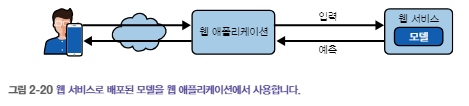

- 구글 버텍서(Vertex) AI와 같은 클라우드에 모델 배포(로드 밸런싱과 자동 확장을 처리하는 간단한 웹 서비스 생성)
 - 저장된 모델을 Google Cloud Strorage에 업로드
 - 입력 데이터(구역 정보)를 담은 JSON 요청을 받아 예측을 담은 JSON 응답을 반환

**모델 배포 이후 일정 시간 간격으로 실시간 성능을 체크하고 성능이 떨어졌을 때 알림을 보낼 수 있는 모니터링 코드 작성 필요**
- 모델 부패로 인해 모델 성능이 시간이 지남에 따라 저하되는 현상

#### **모델 부패 (Model Decay)**

모델 부패란 머신러닝 모델의 성능이 시간이 지남에 따라 점차적으로 저하되는 현상을 말합니다. 이는 모델이 훈련된 데이터와 실제 운영 환경에서의 데이터 간의 차이로 인해 발생합니다. 모델 부패는 다양한 원인에 의해 발생할 수 있으며, 이를 방지하거나 완화하기 위해서는 지속적인 모니터링과 유지보수가 필요합니다.

#### **모델 부패의 주요 원인**

1. **데이터 분포의 변화 (Data Drift)**:
   - 모델이 훈련된 데이터와 실제 운영 환경에서의 데이터 분포가 달라지는 경우입니다. 예를 들어, 주택 시장의 트렌드가 변화하거나, 새로운 개발 프로젝트가 시작되는 경우 데이터 분포가 변할 수 있습니다.

2. **개념 변화 (Concept Drift)**:
   - 예측하려는 목표 변수의 의미나 분포가 시간이 지남에 따라 변화하는 경우입니다. 예를 들어, 주택 가격에 영향을 미치는 요인들이 변화하는 경우입니다. 예를 들어, 경제 상황의 변화나 새로운 규제의 도입 등이 있습니다.

3. **데이터 품질 문제**:
   - 데이터 수집 과정에서 오류가 발생하거나, 데이터의 품질이 저하되는 경우입니다. 예를 들어, 센서 데이터의 결함이나 데이터 입력 오류 등이 있습니다.

4. **환경 변화**:
   - 모델이 운영되는 환경이 변화하는 경우입니다. 예를 들어, 새로운 규제나 정책이 도입되거나, 기술적 환경이 변화하는 경우입니다.

#### **모델 부패의 영향**

모델 부패는 모델의 예측 성능을 저하시켜 비즈니스 의사결정에 부정적인 영향을 미칠 수 있습니다. 예를 들어, 주택 가격 예측 모델의 성능이 저하되면 부동산 투자나 대출 결정에 부정적인 영향을 미칠 수 있습니다.

#### **모델 부패 감지 및 대응 방법**

1. **지속적인 모니터링**:
   - 모델의 성능을 지속적으로 모니터링하여 성능 저하를 조기에 감지합니다. 예를 들어, 예측 정확도, 평균 제곱근 오차(RMSE) 등의 성능 지표를 주기적으로 확인합니다.

2. **데이터 드리프트 감지**:
   - 데이터 분포의 변화를 감지하기 위해 통계적 방법을 사용합니다. 예를 들어, Kullback-Leibler Divergence, Population Stability Index(PSI) 등을 사용하여 데이터 분포의 변화를 감지할 수 있습니다.

3. **모델 재훈련**:
   - 모델 부패가 감지되면, 최신 데이터를 사용하여 모델을 재훈련합니다. 이를 통해 모델이 최신 데이터 분포에 적응할 수 있습니다.

4. **모델 앙상블**:
   - 여러 개의 모델을 앙상블하여 사용하는 방법입니다. 앙상블 모델은 개별 모델의 약점을 보완하여 성능 저하를 완화할 수 있습니다.

5. **데이터 품질 관리**:
   - 데이터 수집 과정에서의 오류를 최소화하고, 데이터의 품질을 지속적으로 관리합니다. 예를 들어, 데이터 정제 과정을 자동화하거나, 데이터 품질 지표를 모니터링합니다.

**마지막으로 만든 모든 모델 백업**</br>
새로운 모델이 어떤 이유로 올바르지 않게 동작하는 경우 이전 모델로 빠르게 롤백하기 위한 절차와 도구 준비

## **결론**

금일 논의된 모든 내용들이 MLOps라고 부르는 광범위한 주제에 포함됨

MLOps(Machine Learning Operations)는 머신러닝 모델의 개발, 배포, 운영 및 관리를 위한 일련의 방법론과 도구를 의미
- 머신러닝 모델의 라이프사이클을 효율적으로 관리하고 자동화하는 것을 목표
- 모델의 신뢰성, 재현성, 확장성을 높이고, 모델 부패와 같은 문제를 예방

※ 연습 문제는 아래 주피터 노트북 파일의 마지막 부분 참고</br>
https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=eV6VyUUGoyiz